# Load and Porcess the Dataset

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Load dataset
data = pd.read_csv("/content/drive/MyDrive/Churn_Modelling.csv")

# Drop irrelevant columns
data = data.drop(columns=["RowNumber", "CustomerId", "Surname"])

# Encode categorical columns
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])
data['Geography'] = LabelEncoder().fit_transform(data['Geography'])

# Features and Target
X = data.drop("Exited", axis=1).values
y = data["Exited"].values.reshape(-1, 1)

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

display(data.head())


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


# Define the Neural Network Architecture

In [18]:
# Network Architecture
input_size = X.shape[1]
hidden_size = 10
output_size = 1

# Initialize weights and biases
np.random.seed(42)
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))


# Define Activation Functions and Loss Function


In [19]:
# Activation Functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(a):
    return a * (1 - a)

def relu(z):
    return np.maximum(0, z)

def relu_derivative(a):
    return (a > 0).astype(float)

# Loss Function: Binary Cross-Entropy
def compute_loss(y_true, y_pred):
    m = y_true.shape[0]
    epsilon = 1e-8
    return -1/m * np.sum(y_true * np.log(y_pred + epsilon) + (1 - y_true) * np.log(1 - y_pred + epsilon))


Text(0, 0.5, 'sigmoid(z)')

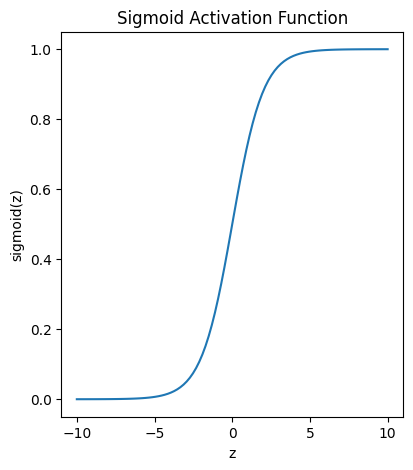

In [28]:
# Generate input values
z = np.linspace(-10, 10, 100)

# Calculate activation outputs
sigmoid_output = sigmoid(z)
relu_output = relu(z)
tanh_output = np.tanh(z)  # Calculate tanh output

# Create the plot
plt.figure(figsize=(15, 5))  # Adjusted figure size for 3 subplots

plt.subplot(1, 3, 1)  # 1 row, 3 columns, first subplot
plt.plot(z, sigmoid_output)
plt.title("Sigmoid Activation Function")
plt.xlabel("z")
plt.ylabel("sigmoid(z)")

Text(0, 0.5, 'relu(z)')

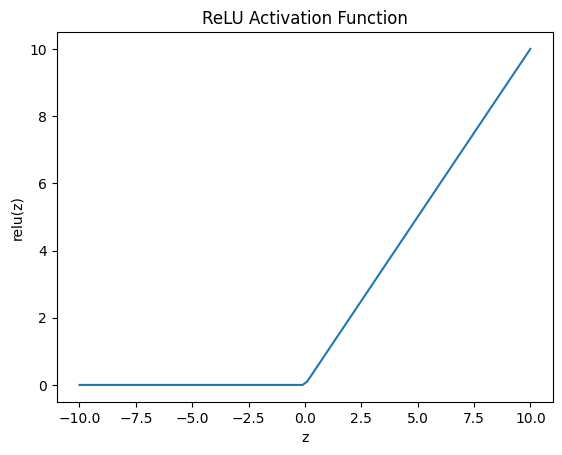

In [26]:
plt.plot(z, relu_output)
plt.title("ReLU Activation Function")
plt.xlabel("z")
plt.ylabel("relu(z)")

Text(0, 0.5, 'tanh(z)')

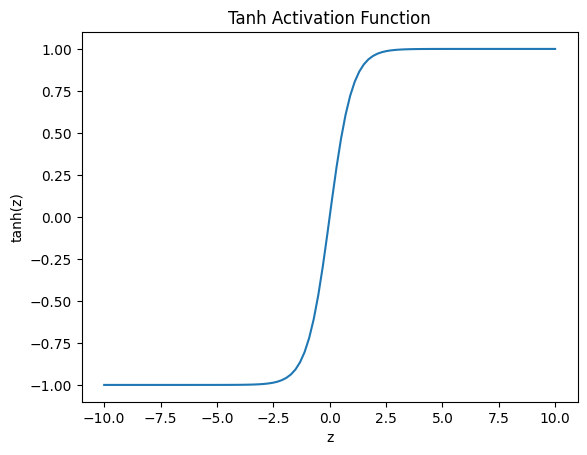

In [27]:
plt.plot(z, tanh_output)
plt.title("Tanh Activation Function")
plt.xlabel("z")
plt.ylabel("tanh(z)")

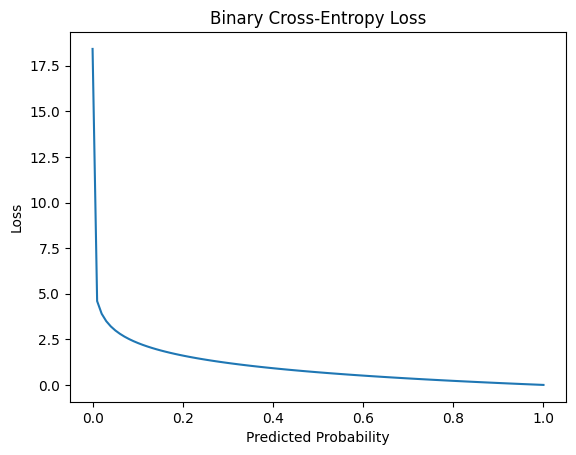

In [9]:
# Assume true labels are all 1
y_true = np.ones((100, 1))

# Generate predicted probabilities from 0 to 1
y_pred = np.linspace(0, 1, 100).reshape(-1, 1)

# Calculate loss values
loss_values = [compute_loss(y_true, pred) for pred in y_pred]

# Create the plot
plt.plot(y_pred, loss_values)
plt.title("Binary Cross-Entropy Loss")
plt.xlabel("Predicted Probability")
plt.ylabel("Loss")
plt.show()

# Training Loop with Forward Pass and Backpropagation

In [10]:
# Hyperparameters
learning_rate = 0.01
epochs = 1000
loss_history = []

for epoch in range(epochs):
    # Forward Pass
    Z1 = np.dot(X_train, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)

    # Compute Loss
    loss = compute_loss(y_train, A2)
    loss_history.append(loss)

    # Backward Pass
    m = y_train.shape[0]
    dZ2 = A2 - y_train
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m

    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * relu_derivative(A1)
    dW1 = np.dot(X_train.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m

    # Update Weights
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    # Print progress
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")


Epoch 0, Loss: 1.3411
Epoch 100, Loss: 0.7824
Epoch 200, Loss: 0.6588
Epoch 300, Loss: 0.5924
Epoch 400, Loss: 0.5518
Epoch 500, Loss: 0.5253
Epoch 600, Loss: 0.5072
Epoch 700, Loss: 0.4940
Epoch 800, Loss: 0.4839
Epoch 900, Loss: 0.4759


# Plot the Loss Curve

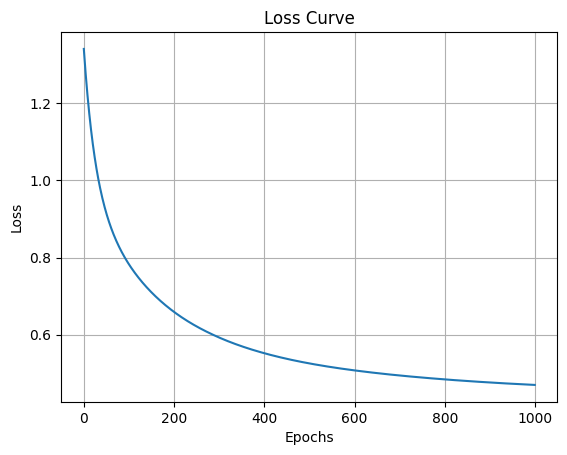

In [11]:
plt.plot(loss_history)
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


# Evaluate the Model



Model Evaluation Metrics:
Accuracy       : 0.8000
Precision      : 0.4660
Recall         : 0.1221
F1 Score       : 0.1935
AUC Score      : 0.7082

Confusion Matrix:
[[1552   55]
 [ 345   48]]


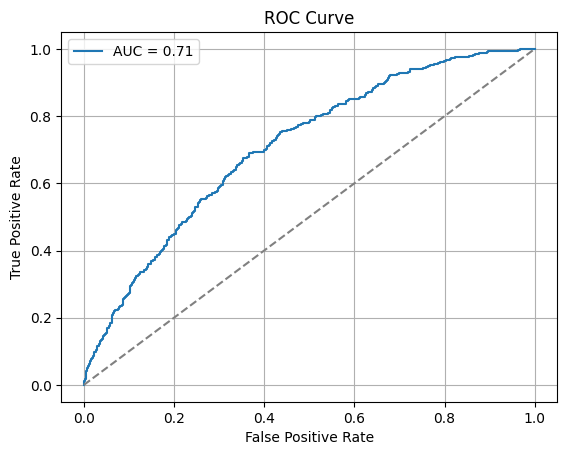

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve

# Prediction probabilities for ROC
def predict_proba(X):
    A1 = relu(np.dot(X, W1) + b1)
    A2 = sigmoid(np.dot(A1, W2) + b2)
    return A2

# Get predictions
y_probs = predict_proba(X_test)
y_pred = (y_probs > 0.5).astype(int)

# Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)
auc = roc_auc_score(y_test, y_probs)

# Display metrics
print("\nModel Evaluation Metrics:")
print(f"Accuracy       : {acc:.4f}")
print(f"Precision      : {prec:.4f}")
print(f"Recall         : {rec:.4f}")
print(f"F1 Score       : {f1:.4f}")
print(f"AUC Score      : {auc:.4f}")
print("\nConfusion Matrix:")
print(conf_mat)

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


In [14]:
def make_prediction(input_data, scaler, W1, b1, W2, b2):
    """
    input_data: List of features [CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts,
                                   HasCrCard, IsActiveMember, EstimatedSalary]
    """
    # Convert categorical values manually
    geography_map = {'France': 0, 'Germany': 1, 'Spain': 2}
    gender_map = {'Female': 0, 'Male': 1}

    input_data[1] = geography_map[input_data[1]]
    input_data[2] = gender_map[input_data[2]]

    input_np = np.array(input_data, dtype=float).reshape(1, -1)
    input_scaled = scaler.transform(input_np)

    # Forward pass through the trained network
    A1 = relu(np.dot(input_scaled, W1) + b1)
    A2 = sigmoid(np.dot(A1, W2) + b2)

    prediction = int(A2 > 0.5)
    confidence = A2[0][0]

    return "Will Churn" if prediction == 1 else "Will Not Churn", confidence


In [15]:
# Sample input: CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary
sample_input = [600, 'France', 'Male', 40, 3, 60000, 2, 1, 1, 50000]

result, confidence = make_prediction(sample_input, scaler, W1, b1, W2, b2)
print(f"Prediction: {result} (Confidence: {confidence:.2f})")


Prediction: Will Not Churn (Confidence: 0.20)


<ipython-input-14-93efcfa6631a>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  prediction = int(A2 > 0.5)


Declaration:
I, Alvin Abraham, confirm that the work submitted in this assignment is my own and has been completed
following academic integrity guidelines. The code is uploaded on my GitHub repository account, and the
repository link is provided below:
GitHub Repository Link: https://github.com/Alv24
Signature: Alvin Abraham